# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Dataset Evaluation

In [2]:
ds = pd.read_csv("/content/data.csv")

In [3]:
print(ds.shape)
ds.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
ds=ds.drop(['Unnamed: 32'],axis=1)

In [5]:
ds

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
ds.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Data Preprocessing

In [7]:
ds["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
column = ds.pop("diagnosis")

In [9]:
ds["diagnosis"] = column

In [10]:
encoder = LabelEncoder()
ds["diagnosis"]=encoder.fit_transform(ds["diagnosis"])

In [11]:
ds

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


# Data Visualization

Text(0.5, 1.0, 'Target Variable count plot')

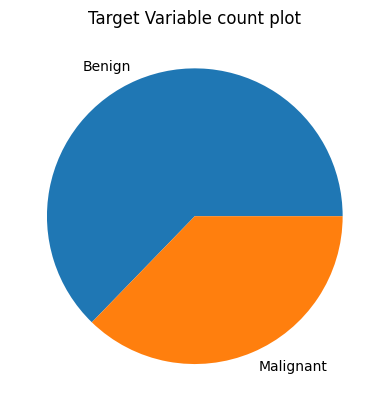

In [12]:
plt.pie(x=ds["diagnosis"].value_counts(),labels=["Benign","Malignant"])
plt.title("Target Variable count plot")

<Axes: >

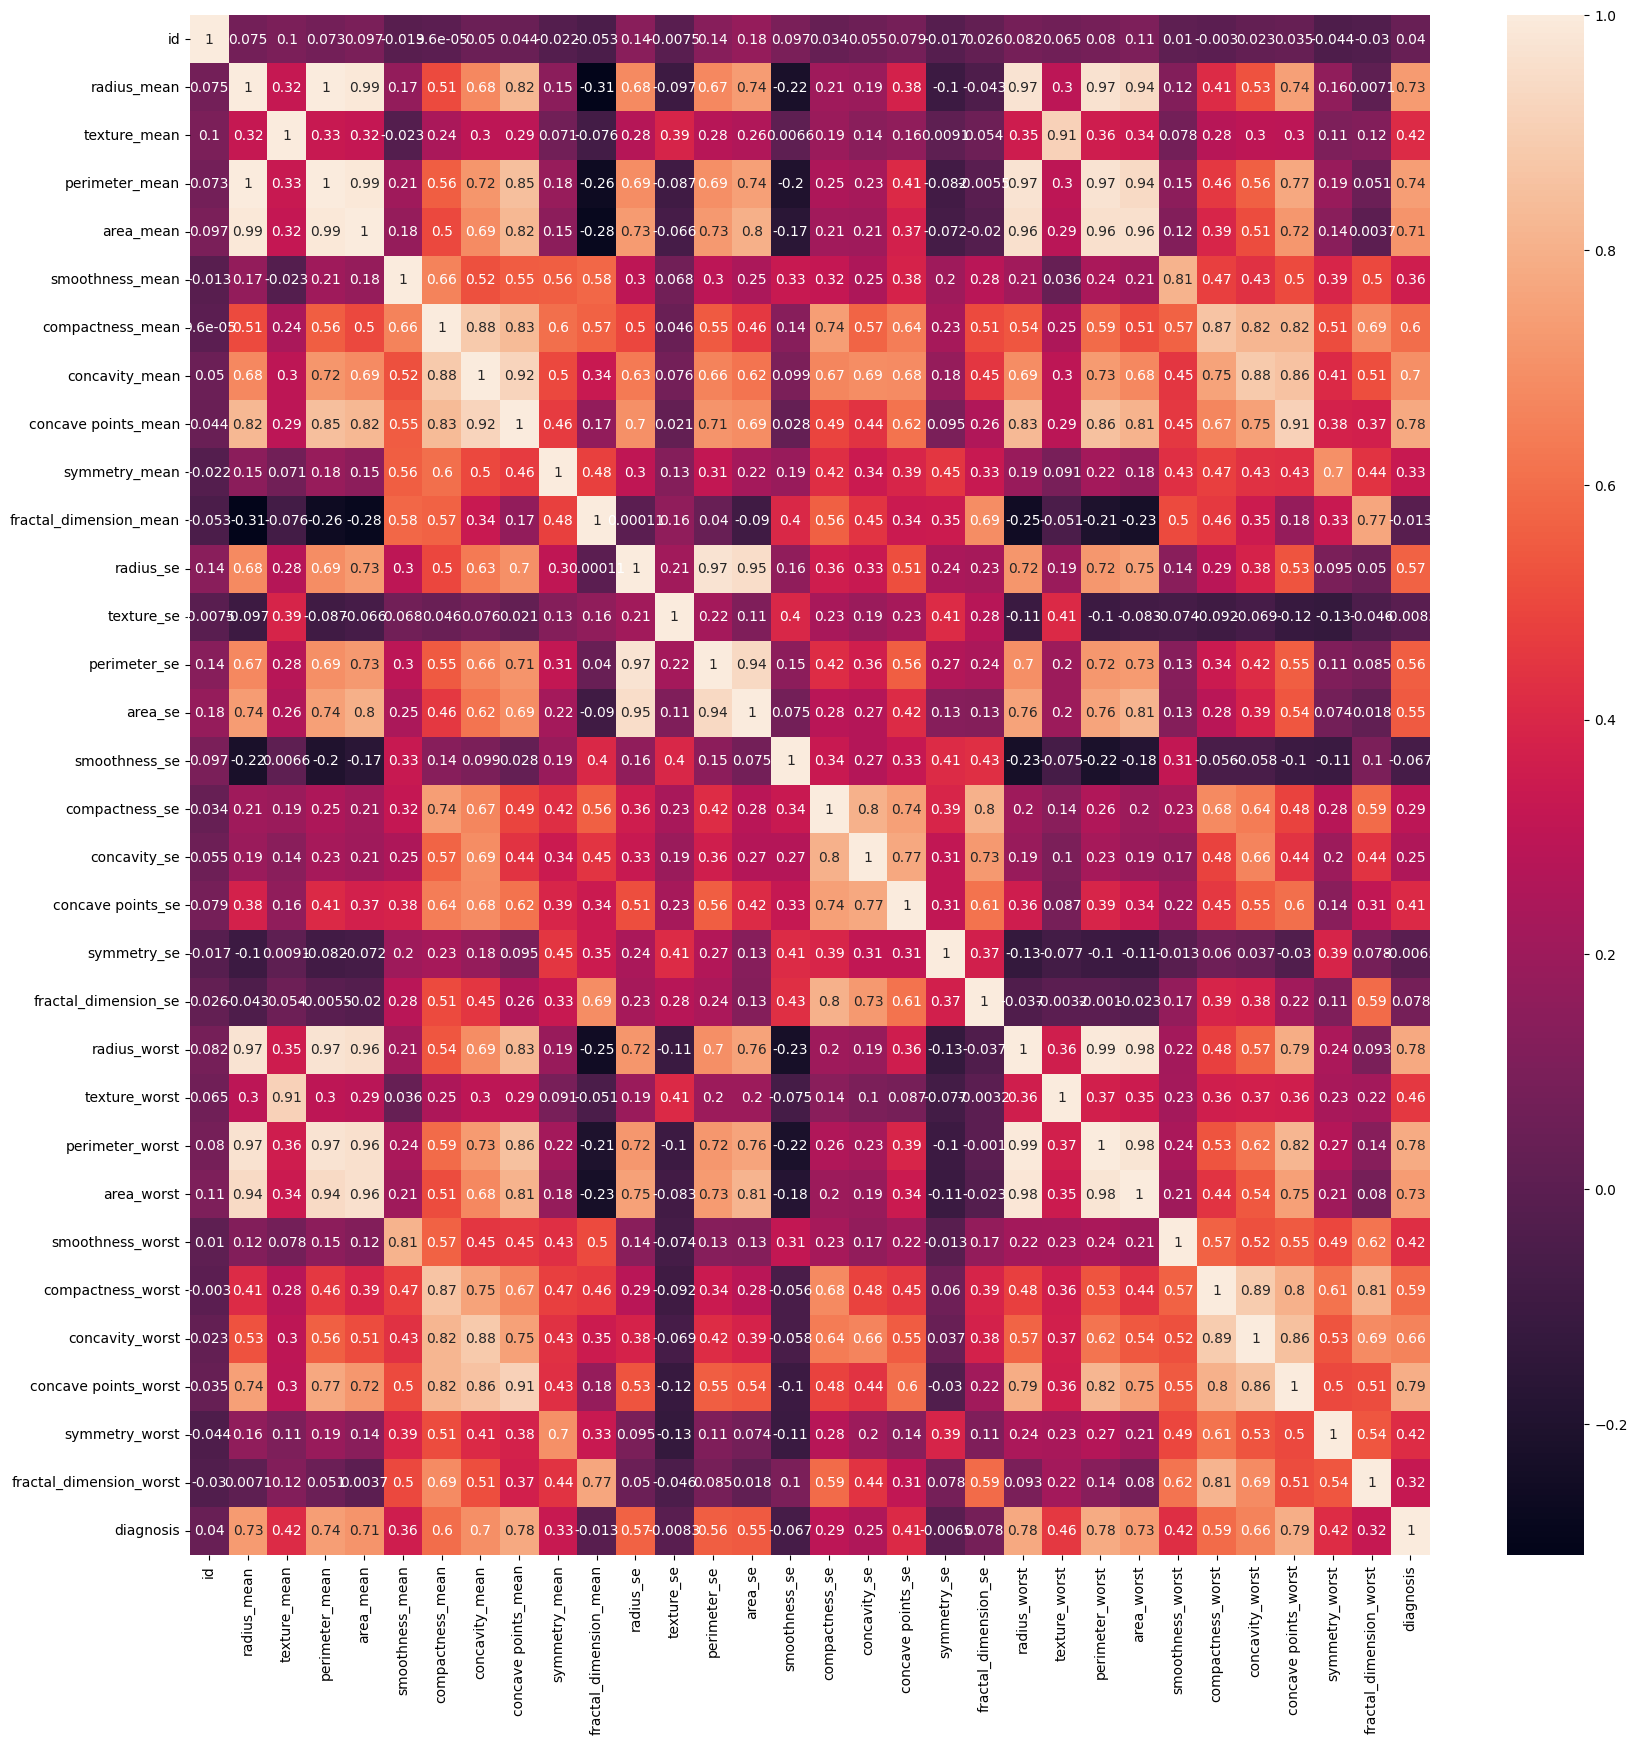

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(ds.corr(),annot=True)

# Data Splitting

In [14]:
X=ds.iloc[:,1:-1]
y=ds.iloc[:,-1]

In [15]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
y.shape
X=X.drop("fractal_dimension_mean",axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [18]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state = 99)

# Model Creation

## Random Forest Classifier

In [19]:
clf = RandomForestClassifier(criterion = 'gini',max_depth=8,min_samples_split=10,random_state=5)

In [20]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [21]:
clf.feature_importances_

array([0.03929742, 0.01397414, 0.09399145, 0.03772424, 0.0047393 ,
       0.00395131, 0.0574864 , 0.07786111, 0.00141914, 0.01489443,
       0.00124351, 0.01752978, 0.01859034, 0.00125932, 0.00407784,
       0.00416581, 0.00225158, 0.00352719, 0.00325683, 0.06216296,
       0.01514548, 0.11652167, 0.11107456, 0.00930554, 0.01778156,
       0.03812291, 0.21590547, 0.00754647, 0.00519224])

## Random Forest Classifier eval

In [22]:
y_pred = clf.predict(X_test)

In [23]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [24]:
confusion_matrix(y_test,y_pred)

array([[99,  0],
       [ 5, 39]])

In [25]:
accuracy_score(y_test,y_pred)

0.965034965034965

In [26]:
cross_val_score(clf,X_train,y_train,cv=10)

array([1.        , 0.95348837, 0.97674419, 0.97674419, 0.97674419,
       0.88372093, 0.92857143, 0.95238095, 0.95238095, 0.92857143])

In [27]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       104
           1       0.89      1.00      0.94        39

    accuracy                           0.97       143
   macro avg       0.94      0.98      0.96       143
weighted avg       0.97      0.97      0.97       143



## Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=9,random_state=50)


In [29]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=9, random_state=50)

In [30]:
clf2.feature_importances_

array([0.        , 0.0309861 , 0.        , 0.09510559, 0.        ,
       0.        , 0.        , 0.        , 0.0044215 , 0.        ,
       0.        , 0.        , 0.04386327, 0.        , 0.        ,
       0.00995099, 0.        , 0.        , 0.00838447, 0.        ,
       0.00997924, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.79730883, 0.        , 0.        ])

In [31]:
ds.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

## K Nearest Neigbours

In [32]:
clf3 = KNeighborsClassifier()
clf3.fit(X_train,y_train)

KNeighborsClassifier()

In [33]:
clf3.score(X_test,y_test)

0.9790209790209791

## Linear Regression

In [34]:
clf4 = LinearRegression()
clf4.fit(X_train,y_train)

LinearRegression()

In [35]:
print(clf4.score(X_train,y_train))
print(clf4.score(X_test,y_test))

0.7850240754764878
0.7000471588486663


## Logistic Regression

In [36]:
clf5 = LogisticRegression(max_iter=600)
clf5.fit(X_train,y_train)

LogisticRegression(max_iter=600)

In [37]:
clf5.score(X_test,y_test)

0.9790209790209791

# Model Evaluation

## Random Forest Classifier


In [38]:
y_pred = clf.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [40]:
confusion_matrix(y_test,y_pred)

array([[99,  0],
       [ 5, 39]])

In [41]:
accuracy_score(y_test,y_pred)

0.965034965034965

In [42]:
cross_val_score(clf,X_train,y_train,cv=10)

array([1.        , 0.95348837, 0.97674419, 0.97674419, 0.97674419,
       0.88372093, 0.92857143, 0.95238095, 0.95238095, 0.92857143])

In [43]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       104
           1       0.89      1.00      0.94        39

    accuracy                           0.97       143
   macro avg       0.94      0.98      0.96       143
weighted avg       0.97      0.97      0.97       143



## Decision Tree Classifier

In [44]:
y2_pred = clf2.predict(X_test)

In [45]:
y2_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [46]:
confusion_matrix(y_test,y2_pred)

array([[96,  3],
       [ 7, 37]])

In [47]:
accuracy_score(y_test,y2_pred)

0.9300699300699301

In [48]:
cross_val_score(clf,X_train,y_train,cv=10)

array([1.        , 0.95348837, 0.97674419, 0.97674419, 0.97674419,
       0.88372093, 0.92857143, 0.95238095, 0.95238095, 0.92857143])

In [49]:
print(classification_report(y2_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       103
           1       0.84      0.93      0.88        40

    accuracy                           0.93       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.93      0.93       143



## K Nearest Neigbours

In [50]:
y3_pred = clf3.predict(X_test)

In [51]:
y3_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [52]:
confusion_matrix(y_test,y3_pred)

array([[98,  1],
       [ 2, 42]])

In [53]:
accuracy_score(y_test,y3_pred)

0.9790209790209791

In [54]:
cross_val_score(clf,X_train,y_train,cv=10)

array([1.        , 0.95348837, 0.97674419, 0.97674419, 0.97674419,
       0.88372093, 0.92857143, 0.95238095, 0.95238095, 0.92857143])

In [55]:
print(classification_report(y3_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.95      0.98      0.97        43

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



## Linear Regression Classifier

In [56]:
y4_pred = clf4.predict(X_test)

In [57]:
y4_pred

array([ 2.01350381e-01, -2.20908788e-01, -6.85499941e-02, -7.08873082e-02,
        2.55080927e-01,  9.71866131e-01,  5.18219693e-01,  1.34920426e+00,
        2.00528843e-01, -4.26401921e-01,  8.39768803e-01,  2.64842765e-01,
        6.00123618e-01,  2.80707899e-01,  1.04420148e-01,  5.44807892e-01,
        1.42921497e+00,  2.94650659e-01,  4.16635892e-01, -1.62257778e-01,
        5.09909503e-01, -1.25832418e-01, -9.78951976e-02,  6.47727546e-02,
        1.05563735e+00, -1.24825074e-01, -1.60872066e-01, -1.15695120e-02,
        6.33867152e-02,  8.90881824e-02,  1.19434868e+00,  1.82214911e-01,
       -6.03431509e-02, -3.38954576e-02, -1.57094775e-01, -6.65674447e-02,
        2.31980470e-01, -5.51646020e-03, -1.33036250e-01,  1.18991801e+00,
        3.18652588e-01,  9.88179188e-02,  3.36511907e-01,  7.49633352e-01,
        7.80604121e-02,  3.38269772e-01,  2.76276456e-01,  1.24778795e-01,
        1.02228593e+00,  1.38682098e-01,  2.88524259e-02,  8.45609866e-01,
        3.02655403e-01,  

In [58]:
cross_val_score(clf,X_train,y_train,cv=10)

array([1.        , 0.95348837, 0.97674419, 0.97674419, 0.97674419,
       0.88372093, 0.92857143, 0.95238095, 0.95238095, 0.92857143])

## Logistic Regression

In [59]:
y5_pred = clf5.predict(X_test)

In [60]:
y5_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [61]:
confusion_matrix(y_test,y5_pred)

array([[99,  0],
       [ 3, 41]])

In [62]:
accuracy_score(y_test,y5_pred)

0.9790209790209791

In [63]:
cross_val_score(clf,X_train,y_train,cv=10)

array([1.        , 0.95348837, 0.97674419, 0.97674419, 0.97674419,
       0.88372093, 0.92857143, 0.95238095, 0.95238095, 0.92857143])

In [64]:
print(classification_report(y5_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       102
           1       0.93      1.00      0.96        41

    accuracy                           0.98       143
   macro avg       0.97      0.99      0.97       143
weighted avg       0.98      0.98      0.98       143

